# Titanic Data Analysis

This project is about analyzing a dataset that contains the demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. You can view a description of this dataset on the Kaggle website, where the data was obtained (https://www.kaggle.com/c/titanic/data).


## Design

In this analysis we will concentrate on some of the factors that made passengers more likely to survive than the rest and also analyze the distribution of the ticket fares.

## Load DATA From CSV

In [3]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
filename = 'titanic-data.csv'
titanic_df = pd.read_csv(filename)


## First Glance at the Data

Now that the data is loaded lets take a peek at the data. We are working with 891 observations with 12 variables.

In [5]:
print(titanic_df.shape)

titanic_df.dtypes

(891, 12)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## VARIABLE DESCRIPTIONS

 * PassengarId:     Serial no
 * Survival:        Survived or not(0 = No; 1 = Yes)
 * pclass          Passenger Class(1 = 1st; 2 = 2nd; 3 = 3rd)
 * name            Passenger full Name
 * sex             Male or Female
 * age             Age in years
 * sibsp           Number of Siblings/Spouses Aboard
 * parch           Number of Parents/Children Aboard
 * ticket          Ticket Number
 * fare            Passenger Fare
 * cabin           Cabin number
 * embarked        Port of Embarkation(C = Cherbourg; Q = Queenstown; S = Southampton)

There are two types of variable in our dataset:
* Numeric Variables: Age, SibSp, Parch, Fare
* Categorical Variables: Pclass, Sex, Embarked


In [6]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Analysis Questions

1. What is the surival rate based on the factors, Age, Gender and Passenger Class of travel? and what is the survival rate based on combination of the factors?
2. How was the fares distributed between the gender?
3. What percentage of the passengers boarded on each port? Was there a difference in their survival rates?
4. Did an adult travelling with a child have better chance of survival?
5. Did the presence of an family member give better chances of survival?

## Sanitizing the data

* Check for duplicate entries
* Replace "Embarked" abbreviations with full port name
* Fix missing age data

In [7]:
# Identify and remove duplicate entries
titanic_data_duplicates = titanic_df.duplicated()
print('Number of duplicate entries is/are {}'.format(titanic_data_duplicates.sum()))

Number of duplicate entries is/are 0


In [8]:
# Replace "Embarked" abbreviations with full port name
def check_col_values(col):
    return titanic_df[col].unique() 

def get_full_port(port):
    if port == "C":
        return "Cherbourg"
    elif port == "Q":
        return "Queenstown"
    elif port == "S":
        return "Southhampton"
    else:
        return port
    
check_col_values("Embarked")
titanic_df["Embarked"] = titanic_df["Embarked"].apply(get_full_port)

## Handling Missing Data in the Ages field

### Distribution of Ages before handling missing ages

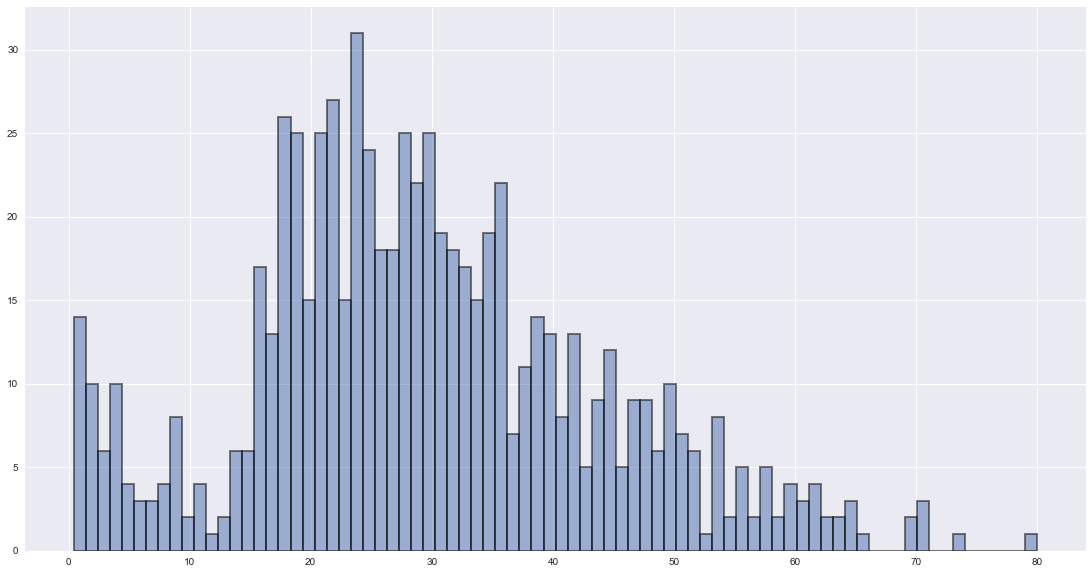

In [9]:
titanic_df.Age.hist(bins=80,figsize=(19,10), linewidth=2,edgecolor='black',alpha=0.5)

In [10]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
print('-----------------------------------------------------')
print('Median Values')
print(titanic_df.median())

-----------------------------------------------------
Median Values
PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64



We can see that the ages are spread from 0 to 80 years. We have passengers from infants to aged people.
* **Mean** = 29.6
* **Median** = 28
* **Mode** is btwn 23 and 24

The distribution of the ages is normal.


### Handling Missing Data in the Ages field
Lets classify the people based on their ages as

* Infant(age<1)
* Child(age: 1 to12)
* Men(age: <12) and male
* Women(age<12)and female



In [12]:
def classifyAge(val):
    age=val.loc['Age']
    if age >12:
        if(val.loc['Sex']=='male'):
            #print(age)
            return "Men"
        elif(val.loc['Sex']=='female'):
            return "Women"
    elif age>=1:
        return "child"
    elif age<1:
        return "Infant"
    else:
        return "Age Unknown"
   
   
    
titanic_df['AgeClassification'] = titanic_df.apply(classifyAge,axis = 1)

In [13]:
titanic_df.groupby("AgeClassification").describe()


Age        Fare       Parch  PassengerId  \
AgeClassification                                                          
Age Unknown       count    0.000000  177.000000  177.000000   177.000000   
                  mean          NaN   22.158567    0.180791   435.581921   
                  std           NaN   31.874608    0.534145   250.552901   
                  min           NaN    0.000000    0.000000     6.000000   
                  25%           NaN    7.750000    0.000000   230.000000   
                  50%           NaN    8.050000    0.000000   452.000000   
                  75%           NaN   24.150000    0.000000   634.000000   
                  max           NaN  227.525000    2.000000   889.000000   
Infant            count    7.000000    7.000000    7.000000     7.000000   
                  mean     0.738571   37.261900    1.285714   556.000000   
                  std      0.161289   50.769691    0.487950   283.732856   
                  min      0.420000    8.516700    1.000000    79.000000   
                  25%      0.710000   16.625000    1.000000   388.000000   
                  50%      0.750000   19.258300    1.000000   645.000000   
                  75%      0.830000   24.129150    1.500000   780.000000   
                  max      0.920000  151.550000    2.000000   832.000000   
Men               count  416.000000  416.000000  416.000000   416.000000   
                  mean    33.037260   26.613891    0.175481   454.754808   
                  std     12.958894   47.052860    0.564385   254.484639   
                  min     14.000000    0.000000    0.000000     1.000000   
                  25%     23.000000    7.895800    0.000000   225.750000   
                  50%     30.000000   10.500000    0.000000   461.500000   
                  75%     40.000000   26.550000    0.000000   677.750000   
                  max     80.000000  512.329200    5.000000   891.000000   
Women             count  229.000000  229.000000  229.000000   229.000000   
                  mean    31.146288   50.325310    0.602620   442.235808   
                  std     11.844913   64.434473    1.077763   261.996997   
                  min     13.000000    6.750000    0.000000     2.000000   
                  25%     22.000000   12.650000    0.000000   248.000000   
                  50%     29.000000   26.000000    0.000000   427.000000   
                  75%     39.000000   69.300000    1.000000   658.000000   
                  max     63.000000  512.329200    6.000000   888.000000   
child             count   62.000000   62.000000   62.000000    62.000000   
                  mean     5.225806   30.889919    1.419355   418.483871   
                  std      3.276440   22.819187    0.588089   277.606559   
                  min      1.000000   10.462500    0.000000     8.000000   
                  25%      2.000000   19.574975    1.000000   175.500000   
                  50%      4.000000   27.900000    1.000000   397.500000   
                  75%      8.000000   32.596875    2.000000   679.750000   
                  max     12.000000  151.550000    2.000000   870.000000   

                             Pclass       SibSp    Survived  
AgeClassification                                            
Age Unknown       count  177.000000  177.000000  177.000000  
                  mean     2.598870    0.564972    0.293785  
                  std      0.763216    1.626316    0.456787  
                  min      1.000000    0.000000    0.000000  
                  25%      3.000000    0.000000    0.000000  
                  50%      3.000000    0.000000    0.000000  
                  75%      3.000000    0.000000    1.000000  
                  max      3.000000    8.000000    1.000000  
Infant            count    7.000000    7.000000    7.000000  
                  mean     2.285714    1.000000    1.000000  
                  std      0.755929    0.816497    0.000000  
                  min      1.0000

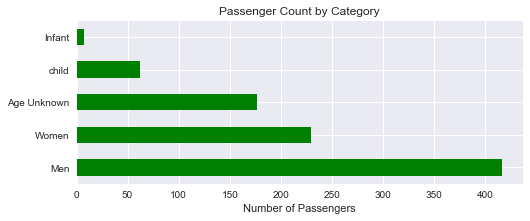

In [14]:
num =titanic_df["AgeClassification"].value_counts()
#num
num.plot(kind="barh", color="green", figsize=(8, 3), title="Passenger Count by Category").set_xlabel("Number of Passengers")


## Passengers with AGE value missing!
* It turns out that there are 177 records with age value missing marked as Age Unknown which contributes to about 19.86% of the data.
* 125 of them have died and 52 of them have survived
* 53 female records without ages
* 124 male records without ages

## Handling Records with missing age

We try to assign the missing age values with the mean ages for male and female. However in order to be more specific we try to find out if the passenger is a child or adult. 

1. Find the title of the passenger(Miss, Mrs, Mr, Master)
2. If the title name is Master we assign the age to be mean age of child
3. If the title Mr, assign the mean age of man
4. If the title is Mrs, consider the passenger as a married lady and assign the mean age of women
5. if the title name is Miss and Parch=0, consider the passenger as a adult female and assign the mean age of women (travelling with nanies or others not taken into account)
6. if the title name is Miss and Parch>0 consider the passenger as a child and assign the mean age of child(travelling with nanies or others not taken into account)
7. Analysing the entire data, we find that apart from miss, mrs, mr, master, the other title which was found without age value was the record with the title name Dr. This records age value was substitued with the Men's mean age. The other titles are not taken into account as there are no age value missing in them.

In [15]:

def handle_missing_age(val):
    age=val.loc['Age']
    if val.loc['AgeClassification']=='Age Unknown':
        Name=val.loc['Name']
        find_comma = Name.find(',')
        find_dot =  Name.find('.')
        title=Name[find_comma+1:find_dot]
        title = title.replace(" ", "")
        if title == 'Mr':
            age= 33
        elif title == 'Mrs':
            age= 31
        elif title == 'Master':
            age= 5
        elif title == 'Miss':
            if val.loc['Parch']==0:
                age= 31
            else:
                age= 5
        elif title == 'Dr':
            age=31
    return age
      
titanic_df['Age'] = titanic_df.apply(handle_missing_age,axis = 1)

In [16]:
titanic_df['AgeClassification'] = titanic_df.apply(classifyAge,axis = 1)

### Visualizing the data based on Age Category after handling missing age values

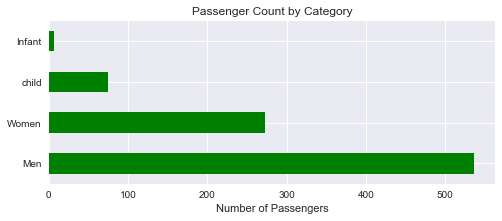

In [17]:
num =titanic_df["AgeClassification"].value_counts()
#num
num.plot(kind="barh", color="green", figsize=(8, 3), title="Passenger Count by Category").set_xlabel("Number of Passengers")


All the fields have been implemented with the age value. Lets look at the age distribution.

### Distribution of the Ages after handling missing age values



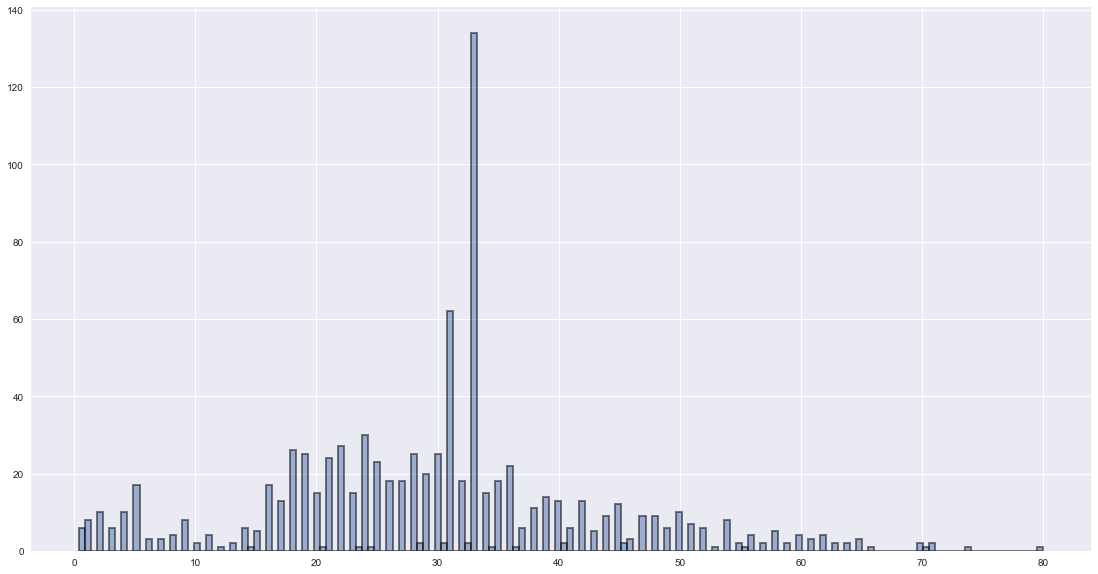

In [18]:
titanic_df.Age.hist(bins=160,figsize=(19,10), linewidth=2,edgecolor='black',alpha=0.5)

In [19]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.845309,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.397172,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,31.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
print('-----------------------------------------------------')
print('Median Values')
print(titanic_df.median())

-----------------------------------------------------
Median Values
PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             31.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64


* **Mean** = 29.8
* **Median** = 31
* **Mode** is btwn 32 and 33

The distribution of the ages is normal. The median and the mode have come towards the mean.


We see that the Unknown Age values are completely removed and replaced with suitable values.

## Distribution of Ages(Genderwise)

Age        Fare       Parch  PassengerId      Pclass  \
Sex                                                                         
female count  314.000000  314.000000  314.000000   314.000000  314.000000   
       mean    27.691083   44.479818    0.649682   431.028662    2.159236   
       std     13.482199   57.997698    1.022846   256.846324    0.857290   
       min      0.750000    6.750000    0.000000     2.000000    1.000000   
       25%     19.000000   12.071875    0.000000   231.750000    1.000000   
       50%     30.000000   23.000000    0.000000   414.500000    2.000000   
       75%     35.000000   55.000000    1.000000   641.250000    3.000000   
       max     63.000000  512.329200    6.000000   889.000000    3.000000   
male   count  577.000000  577.000000  577.000000   577.000000  577.000000   
       mean    31.017626   25.523893    0.235702   454.147314    2.389948   
       std     13.215421   43.138263    0.612294   257.486139    0.813580   
       min      0.420000    0.000000    0.000000     1.000000    1.000000   
       25%     23.000000    7.895800    0.000000   222.000000    2.000000   
       50%     33.000000   10.500000    0.000000   464.000000    3.000000   
       75%     35.000000   26.550000    0.000000   680.000000    3.000000   
       max     80.000000  512.329200    5.000000   891.000000    3.000000   

                   SibSp    Survived  
Sex                                   
female count  314.000000  314.000000  
       mean     0.694268    0.742038  
       std      1.156520    0.438211  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    1.000000  
       75%      1.000000    1.000000  
       max      8.000000    1.000000  
male   count  577.000000  577.000000  
       mean     0.429809    0.188908  
       std      1.061811    0.391775  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    0.000000  
       75%      0.000000    0.000000  
       max      8.000000    1.000000

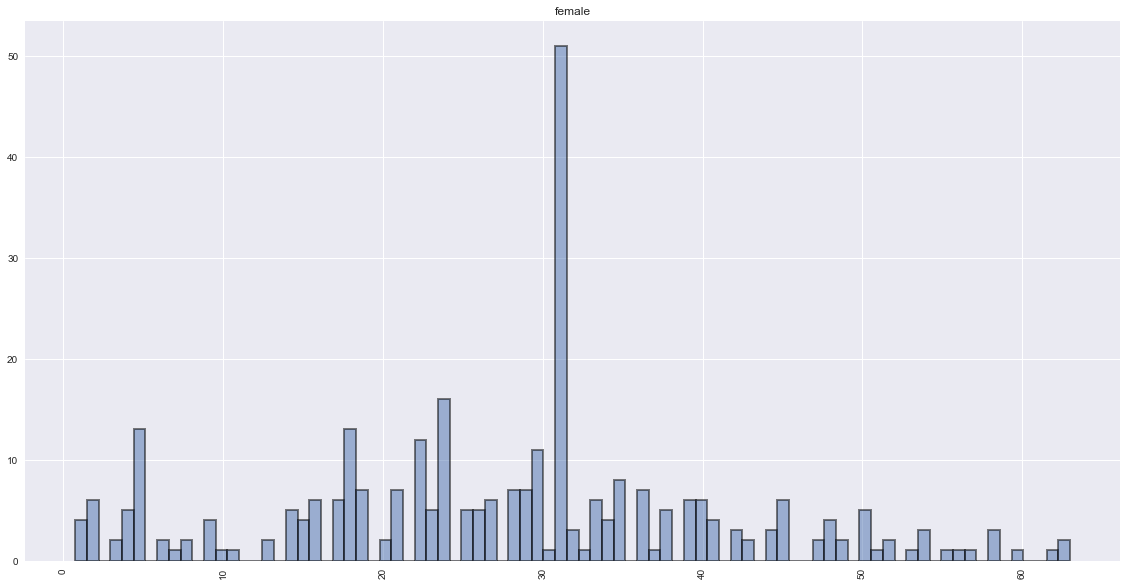

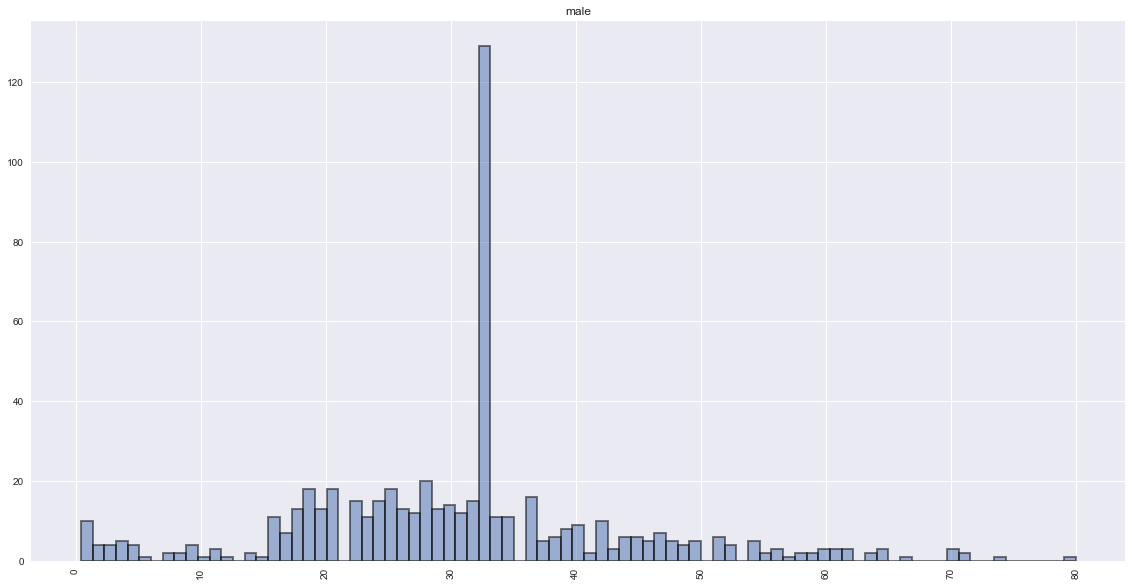

In [21]:
titanic_df.groupby('Sex')['Age'].hist(bins=85,figsize=(19,10),by=titanic_df['Sex'], linewidth=2,edgecolor='black',alpha=0.5)

titanic_df.groupby('Sex').describe()

If we look at the distribution of the population genderwise

* There were more no of males than females who had travelled
* The average age of the female passenger was 27.6
* The average age of the male passenger was 31

## Was age regardless of gender a factor to Survive? 

Grouping the passengers based on whether they died or survived.

In [22]:
survival_group = titanic_df.groupby('Survived')

survival_group.describe()

Age        Fare       Parch  PassengerId      Pclass  \
Survived                                                                      
0        count  549.000000  549.000000  549.000000   549.000000  549.000000   
         mean    30.620219   22.117887    0.329690   447.016393    2.531876   
         std     12.965357   31.388207    0.823166   260.640469    0.735805   
         min      1.000000    0.000000    0.000000     1.000000    1.000000   
         25%     22.000000    7.854200    0.000000   211.000000    2.000000   
         50%     32.000000   10.500000    0.000000   455.000000    3.000000   
         75%     35.000000   26.000000    0.000000   675.000000    3.000000   
         max     74.000000  263.000000    6.000000   891.000000    3.000000   
1        count  342.000000  342.000000  342.000000   342.000000  342.000000   
         mean    28.601374   48.395408    0.464912   444.368421    1.950292   
         std     13.992354   66.596998    0.771712   252.358840    0.863321   
         min      0.420000    0.000000    0.000000     2.000000    1.000000   
         25%     21.000000   12.475000    0.000000   250.750000    1.000000   
         50%     31.000000   26.000000    0.000000   439.500000    2.000000   
         75%     35.000000   57.000000    1.000000   651.500000    3.000000   
         max     80.000000  512.329200    5.000000   890.000000    3.000000   

                     SibSp  
Survived                    
0        count  549.000000  
         mean     0.553734  
         std      1.288399  
         min      0.000000  
         25%      0.000000  
         50%      0.000000  
         75%      1.000000  
         max      8.000000  
1        count  342.000000  
         mean     0.473684  
         std      0.708688  
         min      0.000000  
         25%      0.000000  
         50%      0.000000  
         75%      1.000000  
         max      4.000000

In [23]:
survival_group.std()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,260.640469,0.735805,12.965357,1.288399,0.823166,31.388207
1,252.358840,0.863321,13.992354,0.708688,0.771712,66.596998


### Visualizing the Ages Data based on Survived/Died:

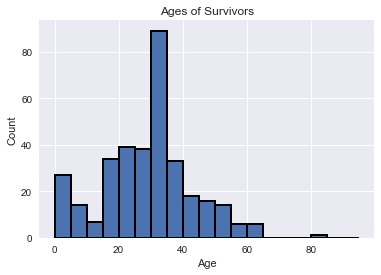

In [24]:
survived_ages  = titanic_df[titanic_df['Survived'] == 1]['Age']
plt.hist(survived_ages.values,bins=np.arange(0,100,5),linewidth=2,edgecolor='black')
plt.title('Ages of Survivors')
plt.xlabel('Age')
plt.ylabel('Count')

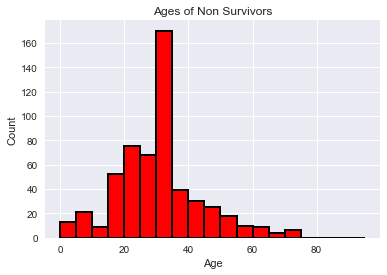

In [25]:
died_ages  = titanic_df[titanic_df['Survived'] == 0]['Age']
plt.hist(died_ages.values,bins=np.arange(0,100,5),linewidth=2,edgecolor='black',facecolor='red')
plt.title('Ages of Non Survivors')
plt.xlabel('Age')
plt.ylabel('Count')

* The mean age of the survivors is very close mean age of non survivors
* The the mean age for each group is well within one standard deviation of the other group, meaning that the difference in mean ages is not statistically significant.

## Did gender play a role in the survival? What about Children and infants?

Lets take a look at the Descriptive Statistics

In [26]:
survived_sex_grouping = titanic_df.groupby(['Sex','Survived'])
survived_sex_grouping.describe()

Age        Fare       Parch  PassengerId  \
Sex    Survived                                                          
female 0        count   81.000000   81.000000   81.000000    81.000000   
                mean    23.728395   23.024385    1.037037   434.851852   
                std     13.728403   24.821287    1.391442   263.522063   
                min      2.000000    6.750000    0.000000    15.000000   
                25%     11.000000    8.850000    0.000000   206.000000   
                50%     25.000000   15.245800    0.000000   420.000000   
                75%     31.000000   27.900000    2.000000   643.000000   
                max     57.000000  151.550000    6.000000   889.000000   
       1        count  233.000000  233.000000  233.000000   233.000000   
                mean    29.068670   51.938573    0.515021   429.699571   
                std     13.147419   64.102256    0.820527   255.048296   
                min      0.750000    7.225000    0.000000     2.000000   
                25%     22.000000   13.000000    0.000000   238.000000   
                50%     31.000000   26.000000    0.000000   400.000000   
                75%     35.000000   76.291700    1.000000   636.000000   
                max     63.000000  512.329200    5.000000   888.000000   
male   0        count  468.000000  468.000000  468.000000   468.000000   
                mean    31.813034   21.960993    0.207265   449.121795   
                std     12.462225   32.409799    0.601382   260.365260   
                min      1.000000    0.000000    0.000000     1.000000   
                25%     24.000000    7.795800    0.000000   212.500000   
                50%     33.000000    9.416650    0.000000   461.000000   
                75%     36.000000   26.000000    0.000000   678.500000   
                max     74.000000  263.000000    5.000000   891.000000   
       1        count  109.000000  109.000000  109.000000   109.000000   
                mean    27.602477   40.821484    0.357798   475.724771   
                std     15.664629   71.355967    0.645826   244.717482   
                min      0.420000    0.000000    0.000000    18.000000   
                25%     19.000000    9.500000    0.000000   272.000000   
                50%     31.000000   26.287500    0.000000   508.000000   
                75%     35.000000   39.000000    1.000000   680.000000   
                max     80.000000  512.329200    2.000000   890.000000   

                           Pclass       SibSp  
Sex    Survived                                
female 0        count   81.000000   81.000000  
                mean     2.851852    1.209877  
                std      0.450309    1.814635  
                min      1.000000    0.000000  
                25%      3.000000    0.000000  
                50%      3.000000    1.000000  
                75%      3.000000    1.000000  
                max      3.000000    8.000000  
       1        count  233.000000  233.000000  
                mean     1.918455    0.515021  
                std      0.834211    0.737533  
                min      1.000000    0.000000  
                25%      1.000000    0.000000  
                50%      2.000000    0.000000  
                75%      3.000000    1.000000  
                max      3.000000    4.000000  
male   0        count  468.000000  468.000000  
                mean     2.476496    0.440171  
                std      0.761411    1.138507  
                min      1.000000    0.000000  
                25%      2.000000    0.000000  
                50%      3.000000    0.000000  
                75%      3.000000    0.000000  
                max      3.000000    8.000000  
       1        count  109.000000  109.000000  
                mean     2.018349    0.385321  
                std      0.922774    0.636952  
                min      1.000000    0.000000  
                25%      1.000000    0.000000  
                50%      

### Visualization of the Survival Data for Male and Female Passengers

In [27]:
survived = titanic_df[titanic_df['Survived'] == 1]
male_count=survived[survived['Sex'] == 'male'].count()
female_count = survived[survived['Sex'] == 'female'].count()

died = titanic_df[titanic_df['Survived'] == 0]
male_diedcount=died[died['Sex'] == 'male'].count()
female_diedcount = died[died['Sex'] == 'female'].count()


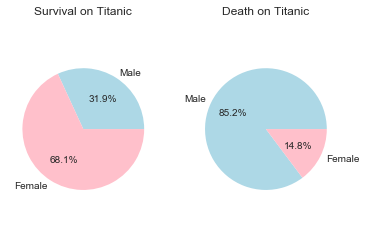

In [28]:
labels = 'Male', 'Female'
sizes = [male_count['Survived'],female_count['Survived']]
colors = ['lightblue', 'pink']

fig = plt.figure()
fig.add_subplot(1,2,1)
plt.axis('equal') 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title("Survival on Titanic")

sizes = [male_diedcount['Survived'],female_diedcount['Survived']]
fig.add_subplot(1,2,2)
plt.axis('equal') 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title("Death on Titanic")

plt.show()

### What about children infants? What were their chances of survival?

* Passengers whose age is under 12 are classified as children.

In [29]:
child_population =titanic_df[(titanic_df["AgeClassification"]=='child')| (titanic_df["AgeClassification"]=='Infant') ]
child_population_num=child_population["Survived"].value_counts()
child_population_num

1    43
0    39
Name: Survived, dtype: int64

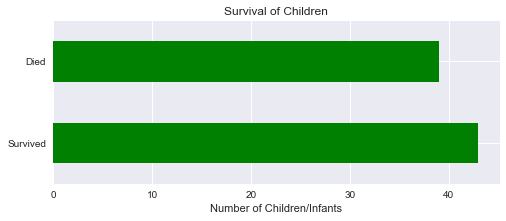

In [30]:
g=child_population_num.plot(kind="barh",color="green",figsize=(8, 3),title="Survival of Children")
g.set_xlabel("Number of Children/Infants")
g.set_yticklabels(['Survived', 'Died'])

In [31]:
infant_population=titanic_df[(titanic_df["AgeClassification"]=='Infant') ]
infant_population_num=infant_population["Survived"].value_counts()
infant_population_num

1    7
Name: Survived, dtype: int64

Lets take a look at the no of passengers male and female who survived and who did not survive. 

* Females - 81 died and 233 Survived
* Males - 468 died and 109 Survived
* Mean age survived male and female(27.6, 29)
* Mean ages of died male and female(31.8,23.7)

We note that the male,female ratio for non-survivors was 468:81 while the male,female ratio for survivors was 109:233.  19% of males on the Titanic survived, while 74% of females survived. Defnitely looks like females had better chances of survival.

### Interpretation

#### The Data as well as the graph indicates that more number of children did not survive. Only 52.4% of the children have survived.
#### However its noteable that all the infants have survived.
#### Women had higher survival rates than men

## Did presence of a family member indicate better chances of survival?



In [37]:
def getlastname(Name):
 find_comma = Name.find(',')
 last_name=Name[0:find_comma]
 return last_name

    
#titanic_df['FamilyName'] = titanic_df['Name'].apply(getlastname)
titanic_df['isFamily'] = (titanic_df['SibSp'] > 0) | (titanic_df['Parch'] > 0)

In [38]:
survived_with_family =titanic_df.loc[(titanic_df["Survived"]==1)]
survived_without_family = titanic_df.loc[(titanic_df["Survived"]==1) & (titanic_df["isFamily"]==0)]
num1 = survived_with_family['isFamily'].value_counts()#=child_population["Survived"].value_counts()
num2=survived_with_family['isFamily'].count()
num1

True     179
False    163
Name: isFamily, dtype: int64

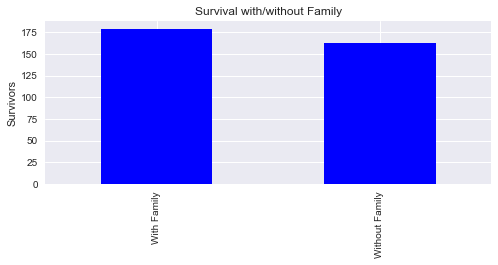

In [39]:
g=num1.plot(kind="bar",color="blue",figsize=(8, 3),title="Survival with/without Family")
g.set_ylabel("Survivors")
g.set_xticklabels(['With Family', 'Without Family'])

### Visualizations of the data based on with/without family member with the combination of class, port of embarkment, survived variables

In [40]:
family_df =titanic_df.groupby(['Survived', 'isFamily'])['PassengerId'].count().unstack('Survived').fillna(0)
family_df_class = titanic_df.groupby(['Survived', 'isFamily', 'Pclass'])['PassengerId'].count().unstack('Survived').fillna(0)
family_df_port = titanic_df.groupby(['Survived', 'isFamily', 'Embarked'])['PassengerId'].count().unstack('Survived').fillna(0)
family_df


Survived,0,1
isFamily,,
False,374,163
True,175,179


In [41]:
family_df_class

Survived           0   1
isFamily Pclass         
False    1        51  58
         2        68  36
         3       255  69
True     1        29  78
         2        29  51
         3       117  50

In [42]:
family_df_port

Survived                 0    1
isFamily Embarked              
False    Cherbourg      48   37
         Queenstown     34   23
         Southhampton  292  101
True     Cherbourg      27   56
         Queenstown     13    7
         Southhampton  135  116

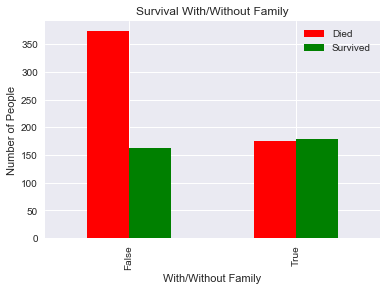

In [43]:
family_df[[0, 1]].plot(kind='bar', stacked=False, color=['red','green'])
plt.title('Survival With/Without Family')
plt.ylabel('Number of People')
plt.xlabel("With/Without Family")
plt.legend(['Died', 'Survived'])
plt.show()

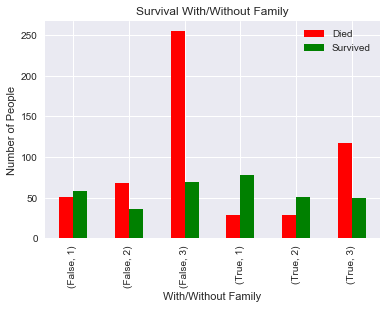

In [44]:
family_df_class[[0, 1]].plot(kind='bar', stacked=False, color=['red','green'])
plt.title('Survival With/Without Family')
plt.ylabel('Number of People')
plt.xlabel("With/Without Family")
plt.legend(['Died', 'Survived'])
plt.show()

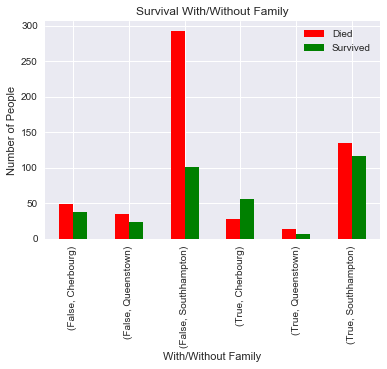

In [45]:
family_df_port[[0, 1]].plot(kind='bar', stacked=False, color=['red','green'])
plt.title('Survival With/Without Family')
plt.ylabel('Number of People')
plt.xlabel("With/Without Family")
plt.legend(['Died', 'Survived'])
plt.show()

* Based on the numerical values calculated, the rate of survival is almost identical to both the groups with/without family 
* Looking at the distribution of the passenger death and survival rates combined with class and port of embarkment variables, we can note that there is a decreased death rate on the side of passengers with family members.


## Was Class differences another factor to Survive?

* Explore data: columns Pclass

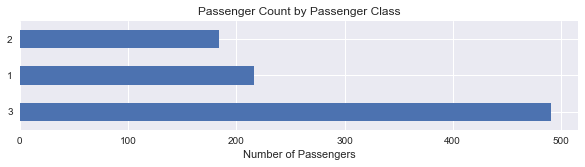

In [46]:
num_class = titanic_df["Pclass"].value_counts()
num_class.plot(kind="barh", figsize=(10, 2), title="Passenger Count by Passenger Class").set_xlabel("Number of Passengers")

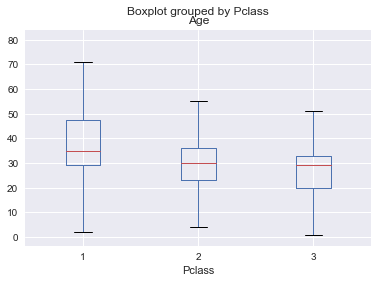

In [47]:
titanic_df.boxplot(column='Age', by='Pclass')

After analyzing this box plot of Class and Age,
* we can infer that the median value of class 1 passengers is higher than that of class 2 and class 3. 
* class 2 and class 3  had younger passengers than class 1. Infact, class 3 had the youngest age group of passengers..

In [48]:

class_df =titanic_df.groupby(['Survived', 'Pclass'])['PassengerId'].count().unstack('Survived').fillna(0)
class_df

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


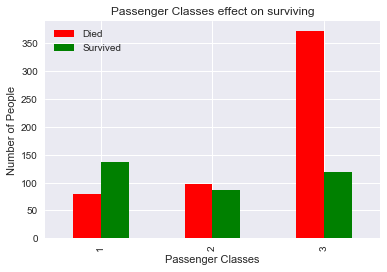

In [49]:
class_df[[0, 1]].plot(kind='bar', stacked=False, color=['red','green'])
plt.title('Passenger Classes effect on surviving')
plt.ylabel('Number of People')
plt.xlabel("Passenger Classes")
plt.legend(['Died', 'Survived'])
plt.show()

In [50]:
class_df_survived =titanic_df.loc[(titanic_df["Survived"]==1)]
df1 = class_df_survived.groupby(['AgeClassification','Pclass'])['PassengerId'].count().unstack('AgeClassification')
df1

AgeClassification,Infant,Men,Women,child
Pclass,,,,
1,1,42,91,2
2,3,8,62,14
3,3,36,60,20


In [51]:
class_df_died =titanic_df.loc[(titanic_df["Survived"]==0)]
df2 = class_df_died.groupby(['AgeClassification','Pclass'])['PassengerId'].count().unstack('AgeClassification')
df2

AgeClassification,Men,Women,child
Pclass,,,
1,77.0,2.0,1.0
2,91.0,6.0,NaN
3,282.0,52.0,38.0


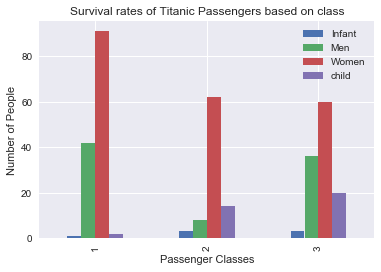

In [52]:
df1[['Infant','Men','Women','child']].plot(kind='bar', stacked=False)
plt.title('Survival rates of Titanic Passengers based on class')
plt.ylabel('Number of People')
plt.xlabel("Passenger Classes")
plt.legend(['Infant','Men','Women','child'])
plt.show()

## Interpretation

#### * First Class people were more likey to survive than the other classes.
#### * A woman in the first class had higher survival rate than all others
#### * Women and children had better survival rates than men
#### * The infants in all the classes survived


## Did the port of embarkment play a role in the survival? How were the fares distributed? 

In [53]:
df1 = titanic_df.groupby(['Embarked','Survived'])['PassengerId'].count().unstack('Survived')
df1


Survived,0,1
Embarked,,
Cherbourg,75,93
Queenstown,47,30
Southhampton,427,217


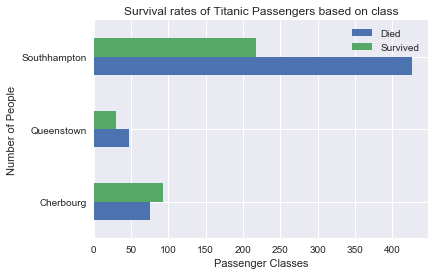

In [54]:
df1[[0,1]].plot(kind='barh', stacked=False)
plt.title('Survival rates of Titanic Passengers based on class')
plt.ylabel('Number of People')
plt.xlabel("Passenger Classes")
plt.legend(['Died','Survived'])
plt.show()

## What about the distribution of the Passenger class on the different embarkment ports?

In [55]:
df2= titanic_df.groupby(['Embarked','Pclass'])['PassengerId'].count().unstack('Pclass')
df2

Pclass,1,2,3
Embarked,,,
Cherbourg,85,17,66
Queenstown,2,3,72
Southhampton,127,164,353


In [56]:
df3= titanic_df.groupby(['Embarked','Pclass',"Survived"])['PassengerId'].count().unstack('Pclass')
df3

Pclass                  1   2    3
Embarked     Survived             
Cherbourg    0         26   8   41
             1         59   9   25
Queenstown   0          1   1   45
             1          1   2   27
Southhampton 0         53  88  286
             1         74  76   67

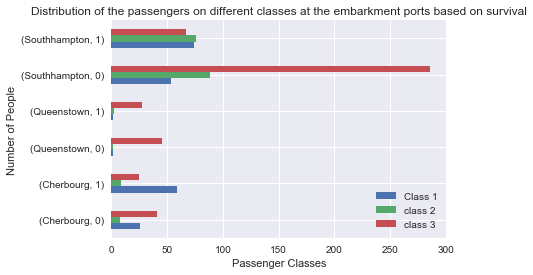

In [57]:
df3[[1,2,3]].plot(kind='barh', stacked=False)
plt.title('Distribution of the passengers on different classes at the embarkment ports based on survival')
plt.ylabel('Number of People')
plt.xlabel("Passenger Classes")
plt.legend(['Class 1','class 2', 'class 3'])
plt.show()

#### Southhampton is the most common port of embarkation in the dataset
#### Queenstown seems to be least common port of embarkation
####  On the whole majority of the passengers travelled in the class 3 ticket
####  Most of the passengers who boarded from Cherbourg were in the class 1, it was only Cherbourg that the class 1 boarders exceeded the class 3 boarders.
#### Cherbourg is the only port where the no of survivors exceeded the death numbers.

## Distribution of Ticket Fares

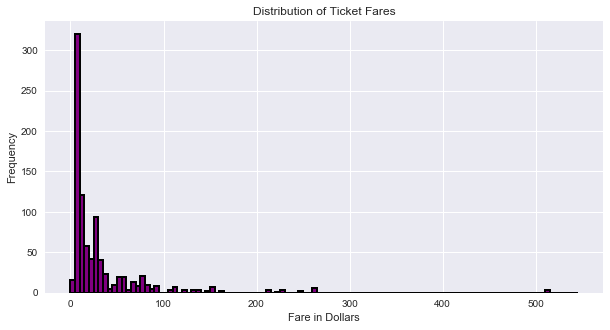

In [58]:
fares = titanic_df["Fare"]
fares.plot(kind="hist", color="purple", linewidth=2,edgecolor='black', bins=range(0, 550, 5), figsize=(10, 5), title="Distribution of Ticket Fares").set_xlabel("Fare in Dollars")

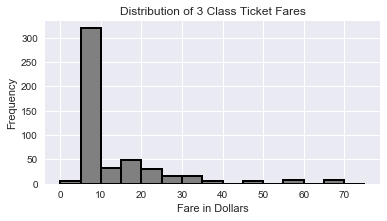

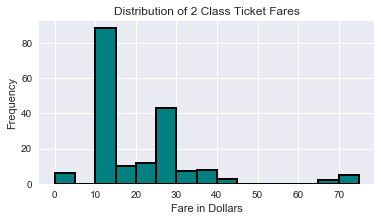

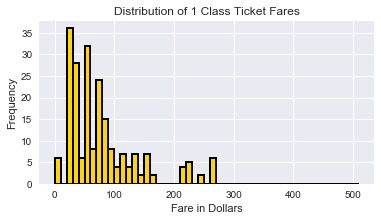

In [59]:
fares_pclass = titanic_df[["Fare", "Pclass"]]

def fare_distribution_by_class(fares_class, pclass=3, color="grey", bin_width=5):
    class_fares = fares_class[fares_class["Pclass"] == pclass]["Fare"]
    bins = range(int(round(min(class_fares),-1)), int(round((max(class_fares)+10), -1)), bin_width)
    class_fares.plot.hist(color=color, figsize=(6,3), linewidth=2,edgecolor='black', bins=bins, title=("Distribution of %s Class Ticket Fares" % pclass)).set_xlabel("Fare in Dollars")
                          
fare_distribution_by_class(fares_pclass)
plt.figure()
fare_distribution_by_class(fares_pclass, pclass=2, color="Teal")
plt.figure()
fare_distribution_by_class(fares_pclass, pclass=1, color="Gold", bin_width=10)

### Ticket fares between passengers who embarked at the same port and were in the same class

In [60]:
fare_subset = titanic_df[["Pclass", "Embarked", "Fare"]]
fare_subset.groupby(["Pclass", "Embarked"]).mean()

Fare
Pclass Embarked                
1      Cherbourg     104.718529
       Queenstown     90.000000
       Southhampton   70.364862
2      Cherbourg      25.358335
       Queenstown     12.350000
       Southhampton   20.327439
3      Cherbourg      11.214083
       Queenstown     11.183393
       Southhampton   14.644083

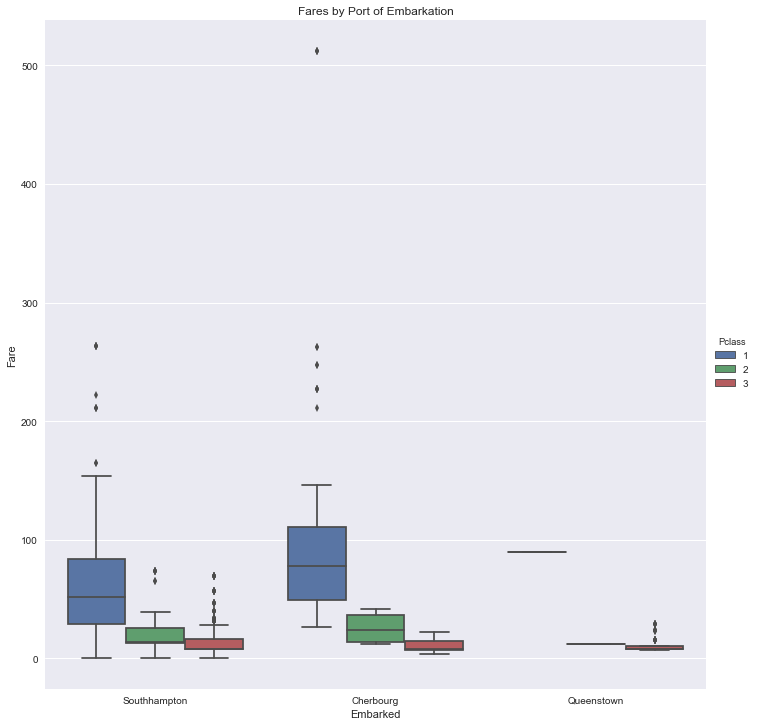

In [61]:
sns.factorplot(data=fare_subset, x="Embarked", y="Fare", hue="Pclass", kind="box", size=10, hue_order=[1,2,3])
plt.title("Fares by Port of Embarkation")

### Breaking down the distribution of fares by passenger class and Port of Embarkment we observe that
* The majority of class 3 fares were between 5 and 10 dollars(Greatest frequency across all classes)
* Most class 2 tickets were btwn 5 and 10 dollars, class 1 tickets were btwn 15 and 20 dollars
* There is a large spread of values in the class 1 tickets distribution(0-513) when compared to the other two classes.
* On an average class 1 tickets at Cherbough seems to be highly priced. The ticket prices varied from person to person. 
* One passenger from Cherbough has paid more than 500 dollars for the ticket which seems to be the highest in the class 1 fare.

## Limitations

* We lack information about how the tickets were sold.
* For tickets prices that were recorded as zero. We are not sure if the passenger travelled free or it was lack of fare data. 

## Free fares

In [62]:
free_fares = fare_subset[fare_subset["Fare"] == 0]
percentage_free = float(len(free_fares))/len(fare_subset)
print("Free Fares ",round(percentage_free*100, 2))
free_fares.groupby(["Pclass"])["Fare"].count()

Free Fares  1.68


Pclass
1    5
2    6
3    4
Name: Fare, dtype: int64

In [63]:
free_fares.groupby(["Embarked"])["Fare"].count()

Embarked
Southhampton    15
Name: Fare, dtype: int64

#### There were around 1.68% free fares across all the classes
#### All the passengers who travelled on Free were male and have travelled alone, not with any family members
#### Free tickets were recorded only in Southhampton.

## Conclusions

* Class and Sex were factors effecting the survival.
* A woman with upper social status i.e. Class 1 ticket had the best chance of survival
* A man in class 3 gave the lowest chance of survival
* In general, Women & children across all classes were having higer survival rates men
* Age of the passenger did not seem to be a major factor.

However being a child or woman does not guarantee a 100% survival chance.
passengers with family or relatives tend to have greater chance of survival than passenger without family/relatives onboard